# No . 2

In [ ]:
# Exploratory Data Analysis:

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('student_performance_data.csv')
df

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


In [4]:
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [5]:
df.tail()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes
499,500,Female,24,21,96.99,2.64,Engineering,No,No


In [6]:
# a) For each gender, which major has the highest total study hours per week?

In [7]:
StudyHoursPerWeek_by_Major = df.groupby(['Gender', 'Major'])['StudyHoursPerWeek'].sum()
print(StudyHoursPerWeek_by_Major.groupby('Gender').idxmax())

Gender
Female    (Female, Business)
Male       (Male, Education)
Name: StudyHoursPerWeek, dtype: object


In [8]:
# b) Which gender has the highest overall average attendance rate? Return the gender and the average
#    attendance rate?

In [17]:
gender_average_attendance = df.groupby('Gender')['AttendanceRate'].mean().reset_index() 
# Grouping the columns needed for the question and getting its average
higher_gender_attendance = gender_average_attendance.loc[gender_average_attendance['AttendanceRate'].idxmax()]
# the row with the highest attendance rate using idxmax
print(f"{higher_gender_attendance ['Gender']} has the highest gender attendance with an attendance rate of {higher_gender_attendance ['AttendanceRate']:.3f}.")

Female has the highest gender attendance with an attendance rate of 75.926.


In [18]:
# c) What percentage of students have part-time jobs, and what percentage have no part-time jobs?

In [19]:
job_counts = df['PartTimeJob'].value_counts(normalize=True) * 100
print(job_counts)

PartTimeJob
Yes    53.6
No     46.4
Name: proportion, dtype: float64


In [20]:
# d) For each gender, what is the mean GPA and variance of age? (

In [24]:
gender= df.groupby('Gender').agg({'GPA': 'mean', 'Age': 'var'})
print(gender)

             GPA       Age
Gender                    
Female  2.995352  4.005637
Male    2.974467  3.960130


In [25]:
# e) Create a visualization that effectively shows if there is a relationship between any two variables
#    of your choice. Your answer must be given in a single pipe.

In [27]:
import seaborn as sns

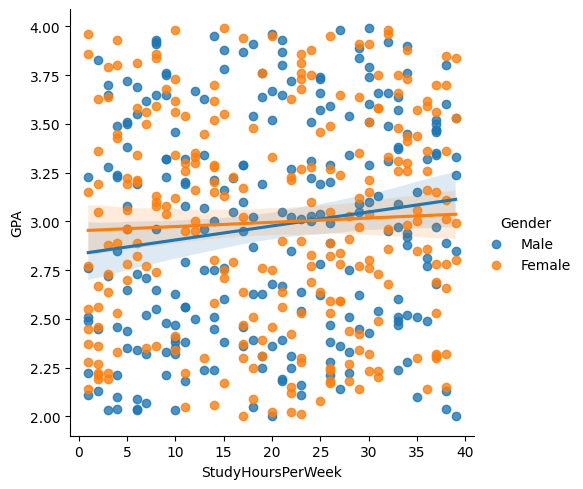

In [30]:
sns.lmplot(x='StudyHoursPerWeek', y='GPA', hue='Gender', data=df)